In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
titanic_data = pd.read_csv('../knn/train.csv', header=0)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


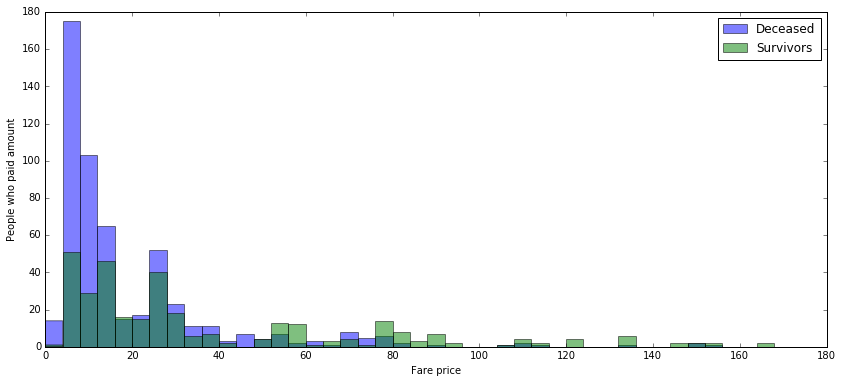

In [16]:
survivors = titanic_data[titanic_data.Survived == 1].Fare
dead_pool = titanic_data[titanic_data.Survived == 0].Fare

plt.figure(figsize=(14, 6))
opacity = 0.5
plt.hist(dead_pool, bins=np.arange(0, 180, 4), alpha=opacity, label="Deceased")
plt.hist(survivors, bins=np.arange(0, 180, 4), alpha=opacity, label="Survivors")

plt.legend()
plt.xlabel('Fare price')
plt.ylabel('People who paid amount')
plt.show()

#### Since this is not a normal distribution, we will use the Mann-Whitney U-Test

In [17]:
from scipy.stats import mannwhitneyu

u, p = mannwhitneyu(survivors, dead_pool)
print('Results:\nU-Statistic:\t%.5f\np-value:\t%.5f'% (u, p *2))

u2, p2 = u, p = mannwhitneyu(dead_pool, survivors)
print('Results:\nU-Statistic:\t%.5f\np-value:\t%.5f'% (u2, p2 *2))

Results:
U-Statistic:	129951.50000
p-value:	0.00000
Results:
U-Statistic:	57806.50000
p-value:	0.00000


## We cannot reject the null hypothesis that there is not a statistically significant diffence in fares paid by survivors and non-survivors.??????

#### What best fits the linear model for relationship between fare and age?

In [51]:
from scipy.stats import linregress

fare = titanic_data[(titanic_data.Fare > 0) & (titanic_data.Age > 0)].Fare.tolist()
age = titanic_data[(titanic_data.Age > 0) & (titanic_data.Fare > 0)].Age.tolist()

slope, intercept, r_value, p_value, std_err = linregress(age, fare)
print('The slope is {}'.format(slope))

The slope is 0.36078573560381055


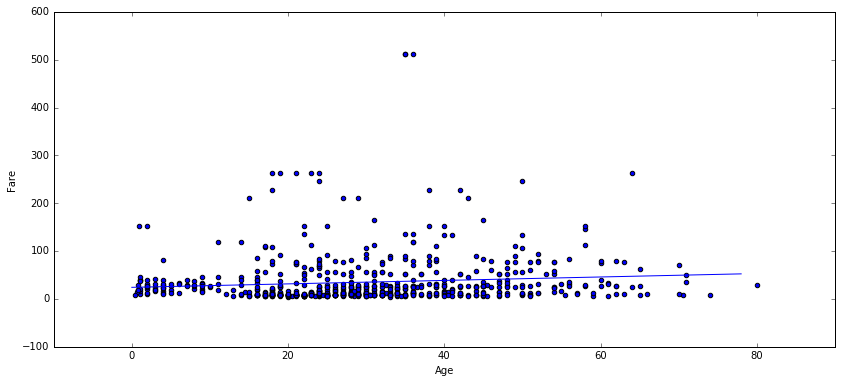

In [52]:
plot_range = np.arange(0, 80, 2)


plt.figure(figsize=(14, 6))
plt.scatter(age, fare)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.plot(plot_range,[(x * slope)+ intercept for x in plot_range],'b')
plt.show()